# CC3001 2023-2 - Tarea 1: Vecinos más cercanos -- Ignacio Romero Aravena


## Profesores: Nelson Baloian, Benjamín Bustos, Sebastián Ferrada, Patricio Poblete

En esta tarea, ustedes programarán y validarán operaciones de búsqueda de vecinos más cercanos.

Al terminar la tarea exitosamente, usted debería
1. haber refrescado sus conocimientos de programación en Python;
2. estar familiarizado con ambientes de programación como IPython y https://colab.research.google.com;
3. saber cómo entregar sus tareas para el resto del semestre.

---

En esta tarea, dada una lista $A$ de puntos en 2D, se le pide
1. programar un método para calcular los $k$ vecinos más cercanos a un punto dado $q$ escogido entre los puntos en $A$;
2. programar un método para calcular los $k$ vecinos más cercanos para todos los puntos en $A$; y
3. programar un método para calcular el reverso de los $k$ vecinos más cercanos a un punto dado $q$ escogido entre los puntos en $A$.

Para realizar la tarea, deben hacer una copia de este archivo/colab, reemplazar `NOMBRE ESTUDIANTE` por su nombre en el nombre del archivo y título del documento, y llenar los vacíos con sus explicaciones, sus implementaciones y sus pruebas para las funciones pedidas.


Según las condiciones de su sección, pueden entregar un link a su tarea en `colab` o subir un archivo en el formato Jupyter NoteBook (`.ipynb`).

Para programar las funciones deben usar listas de Python. Los únicos métodos de los objetos de tipo `list` que pueden utilizar en su solución son los siguientes:

-Los métodos `list`, `sort` y `append`.

También se puede usar el módulo math.

**No se puede utilizar ningún otro método disponible en módulos de Python.**

---
# Definiciones

Sea un conjunto de puntos en 2D, que podemos representar en una lista $A$ que contiene listas de tamaño 2. La distancia Euclidiana entre dos puntos $p_1=(x_1,y_1)$ y $p_2=(x_2,y_2)$ se define como:

$$
\mathsf{distanciaEuclidiana}(p_1,p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
$$


Dado un número natural $k \geq 1$, se define lo siguiente:

- $k$ vecinos más cercanos: Dado un punto $q \in A$, corresponde al conjunto de los $k$ puntos en $A-\{q\}$, más cercanos a $q$ de acuerdo a su distancia Euclidiana. Se puede dar el caso que exista más de un conjunto de $k$ vecinos más cercanos que cumpla con esta propiedad (por ejemplo, cuando dos puntos estén a la misma distancia de $q$), en cuyo caso se devuelve cualquiera de éstos. Note que este conjunto es de tamaño $k$, y que $q$ nunca pertenece a este conjunto.

- Todos los $k$ vecinos más cercanos de $A$: corresponde al conjunto de los $k$ vecinos más cercanos para todos los puntos en $A$.

- Reverso de los $k$ vecinos más cercanos: dado el conjunto de todos los $k$ vecinos más cercanos en $A$, el reverso de los $k$ vecinos más cercanos de un punto $q \in A$ es el conjunto de todos los puntos en $A$ para los cuales $q$ pertenece a sus $k$ vecinos más cercanos. Note que este conjunto puede tener desde tamaño $0$ ($q$ no pertenece a ninguno de los conjuntos de $k$ vecinos más cercanos) hasta tamaño $|A| - 1$ ($q$ pertenece a todos los conjuntos de $k$ vecinos más cercanos en $A$, excepto el de sí mismo).

Por ejemplo, sea el conjunto de puntos 2D: $(0,0)$, $(1,1)$, $(4,1)$, $(0,3)$ y $(1,3)$. La lista $A$ queda definida como sigue:

In [1]:
A = [[0.0,0.0], [1.0,1.0], [4.0,1.0], [0.0,3.0], [1.0,3.0]]

Note que en la lista $A$, el índice del punto $(0,0)$ es $0$, el índice del punto $(1,1)$ es $1$, el índice del punto $(4,1)$ es $2$, el índice del punto $(0,3)$ es $3$, y el índice del punto $(1,3)$ es $4$.

La siguiente figura muestra la lista $A$. El número en rojo indica el índice del punto en la lista, el número en la línea punteada indica la distancia Euclidiana entre los puntos.

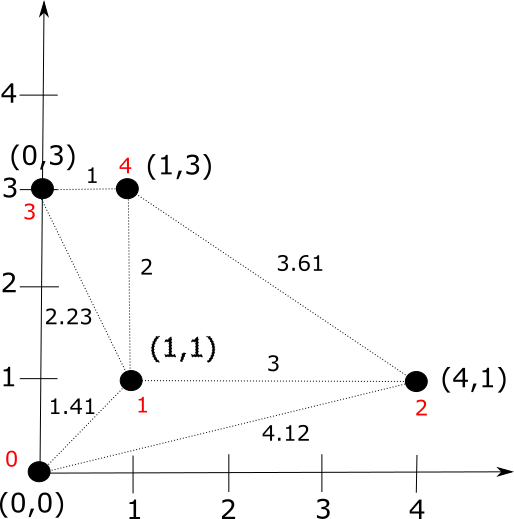

Sea $k=2$. Se tiene que:

- El conjunto de $k$ vecinos más cercanos del punto $q=0$ ($q$ indica el índice en el arreglo $A$ del punto considerado) es $[1,3]$ (nuevamente se indican los índices de los puntos más cercanos).
- El conjunto de todos los $k$ vecinos más cercanos es $[[1,3], [0,4], [1,4], [1,4], [1,3]]$.
- El reverso de los $k$ vecinos más cercanos de $q=1$ es $[0,2,3,4]$.

---
# Parte 1: Cálculo de los $k$ vecinos más cercanos

Programe el método `k_vecinos_mas_cercanos(k,q,A)` que calcula los $k$ vecinos más cercanos de $q$ en $A$. Note que $k$ es un número natural $\geq 1$, $q$ es un entero que representa su índice en $A$ que contiene a $q$, y $A$ es un arreglo de puntos 2D (esto se repite para todos los métodos que deben implementar). El método debe retornar una lista ordenada de los $k$ vecinos, en donde el orden está dado por el índice de los vecinos en $A$ (como en el ejemplo de la sección previa).




A continuación se presenta una implementación incorrecta del método: deben corregirla. El bloque incluye un test para verificar que su código devuelve el resultado apropiado: pueden (¡y deberían!) extender estos tests para ayudar a su desarrollo.

In [2]:
#list (con 2 elementos), list (con 2 elementos) -> float
#Calcula la distancia euclidiana entre dos puntos del plano cartesiano
def distanciaEuclidiana(punto1, punto2):
    x1, y1 = punto1
    x2, y2 = punto2
    distancia = ((x2 - x1)**2 + (y2 - y1)**2)**(0.5)
    return distancia

# Test
assert(distanciaEuclidiana([4, 2], [4, 6])==4.0)
assert(distanciaEuclidiana([5,32],[-7,8]) == 26.832815729997478)


In [3]:
# Encuentra el minimo de una lista a
#Función tomada del ejercicio 1
def minimo(a):
    m=a[0]
    # Al comenzar cada iteración, se cumple que m==max(a[0],...,a[k-1])
    for k in range(1,len(a)):
        if a[k]<m:
            m=a[k]
    return m

# Test
assert(minimo([25, 132, 93, 17, 54, 28])== 17)
assert(minimo([0,23,0,0,-9000,1,300])==-9000)

In [4]:
#list, int>0 -> list
#Encuentra, en orden ascendente, los k elementos más pequeños de una lista
def smallest_k(lista, k):
    smallest_list = []
    
    for i in range(k):
        smallest = minimo(lista)
        smallest_list.append(smallest)
        lista = [num for num in lista if num != smallest]
    
    return smallest_list

# Test
assert(smallest_k([8, 3, 1, 10, 5, 0],3)==[0,1,3])



In [5]:
#0<int<len(A)-1, 0<int<len(A)-1, list -> list
def k_vecinos_mas_cercanos(k,q,A):
    """calcula los k vecinos más cercanos de q en A."""
    myPoint = A[q]
    
    distancias = []
    for p in A:
        distancias.append(distanciaEuclidiana(myPoint,p))

    smallest = smallest_k(distancias,k+1)

    resultado = []
        
    for i in range(0,len(A)):
        for j in smallest:
            if distancias[i] == 0.0:
                pass
            elif distancias[i] == j:
                resultado.append(i)
            else:
                pass

    return resultado
     

# Test
A = [[0.0,0.0], [1.0,1.0], [4.0,1.0], [0.0,3.0], [1.0,3.0]]
assert k_vecinos_mas_cercanos(2,0,A) == [1,3]
assert k_vecinos_mas_cercanos(2,1,A) == [0,4]
assert k_vecinos_mas_cercanos(2,2,A) == [1,4]
assert k_vecinos_mas_cercanos(2,3,A) == [1,4]
assert k_vecinos_mas_cercanos(2,4,A) == [1,3]

---
# Parte 2: Cálculo de todos los $k$ vecinos más cercanos

Programe el método `todos_k_vecinos_mas_cercanos(k,A)` que calcula todos los $k$ vecinos más cercanos en $A$.


A continuación se presenta una implementación incorrecta del método: deben corregirla. El bloque incluye un test para verificar que su código devuelve el resultado apropiado: pueden (¡y deberían!) extender estos tests para ayudar a su desarrollo.


In [6]:
#0<int<len(A)-1, list -> list
def todos_k_vecinos_mas_cercanos(k,A):
    """calcula todos los k vecinos mas cercanos de los puntos en A."""
    resultado = [] 

    for q in range(len(A)):
        resultado.append(k_vecinos_mas_cercanos(k,q,A))
    return resultado

# Test
A = [[0.0,0.0], [1.0,1.0], [4.0,1.0], [0.0,3.0], [1.0,3.0]]
assert todos_k_vecinos_mas_cercanos(2,A) == [[1,3],[0,4],[1,4],[1,4],[1,3]]

---
# Parte 3: Cálculo del reverso de los $k$ vecinos más cercanos

Programe el método `reverso_k_vecinos_mas_cercanos(k,q,A)` que calcula el reverso de los $k$ vecinos más cercanos en $A$ para el punto $q \in A$.  El método debe retornar una lista ordenada de los vecinos, en donde el orden está dado por el índice de los vecinos en $A$.



A continuación se presenta una implementación incorrecta del metodo: deben corregirla. El bloque incluye un test para verificar que su código devuelve el resultado apropiado: pueden (¡y deberían!) extender estos tests para ayudar a su desarrollo.


In [7]:
#0<int<len(A)-1, 0<int<len(A)-1, list -> list
def reverso_k_vecinos_mas_cercanos(k,q,A):
    """calcula el reverso de los k vecinos mas cercanos de q en A."""
    resultado = []
    for i in range(len(A)):
        if i == q:
            pass
        else:
            if q in k_vecinos_mas_cercanos(k,i,A):
                resultado.append(i)
            else:
                pass
                
    return resultado

# Test
A = [[0.0,0.0], [1.0,1.0], [4.0,1.0], [0.0,3.0], [1.0,3.0]]
# print(reverso_k_vecinos_mas_cercanos(2,4,A))
assert reverso_k_vecinos_mas_cercanos(2,0,A) == [1]
assert reverso_k_vecinos_mas_cercanos(2,1,A) == [0,2,3,4]
assert reverso_k_vecinos_mas_cercanos(2,2,A) == []
assert reverso_k_vecinos_mas_cercanos(2,3,A) == [0,4]
assert reverso_k_vecinos_mas_cercanos(2,4,A) == [1,2,3]

## ¿Qué hay que entregar?

Usted debe entregar este mismo archivo, modificado de acuerdo a lo que se pide. Haga todos los cambios necesarios para explicar y documentar adecuadamente su código. No olvide poner su nombre.